In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

plt.style.use('ggplot')
sns.set_palette("viridis")


#instead of using drive we can use this to save time and it is easy and efficient
def load_data():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\nSuccessfully loaded {df.shape[0]} patient records.")
    return df

# Execute loading
df = load_data()

Please upload 'heart_cleveland_upload.csv'...


Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv

Successfully loaded 297 patient records.


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [16]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [5]:
#To check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.shape

(297, 14)

boxplot is used to detect outliers efficiently so i used boxplot

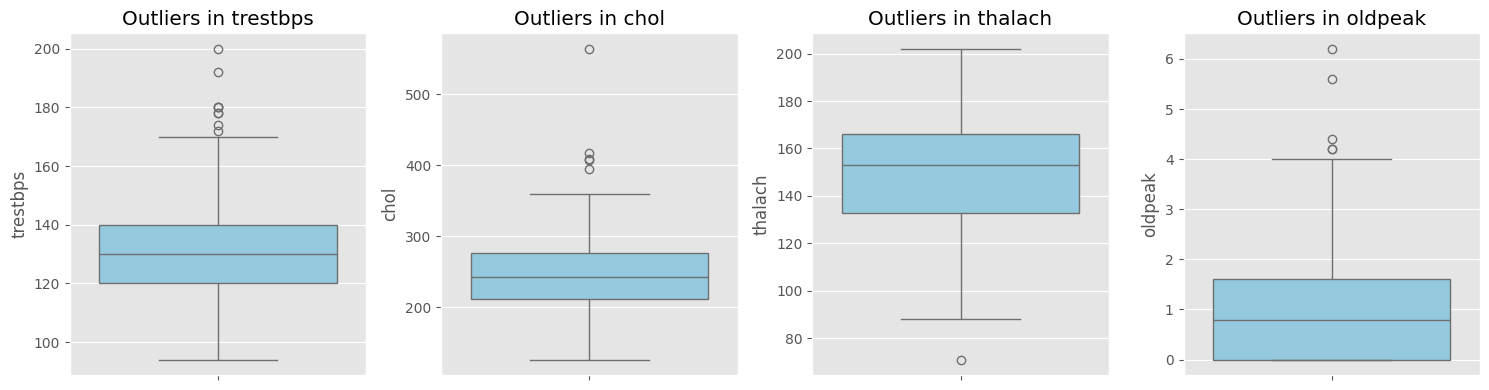

In [14]:
def check_outliers(df, features=['trestbps', 'chol', 'thalach', 'oldpeak']):
    plt.figure(figsize=(15, 4))
    for i, col in enumerate(features):
        plt.subplot(1, 4, i+1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()

check_outliers(df)

Checking for class imbalance


/tmp/ipython-input-971614077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=df, palette='magma')


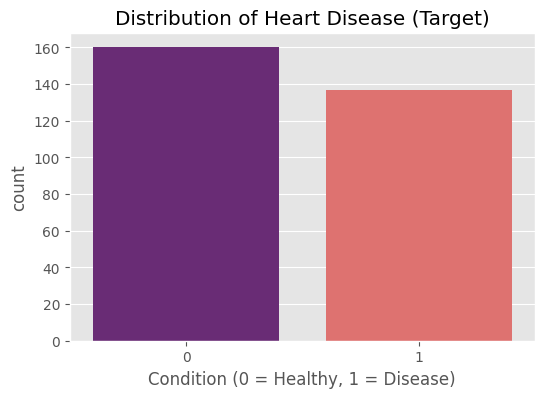

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='condition', data=df, palette='magma')
plt.title('Distribution of Heart Disease (Target)')
plt.xlabel('Condition (0 = Healthy, 1 = Disease)')
plt.show()

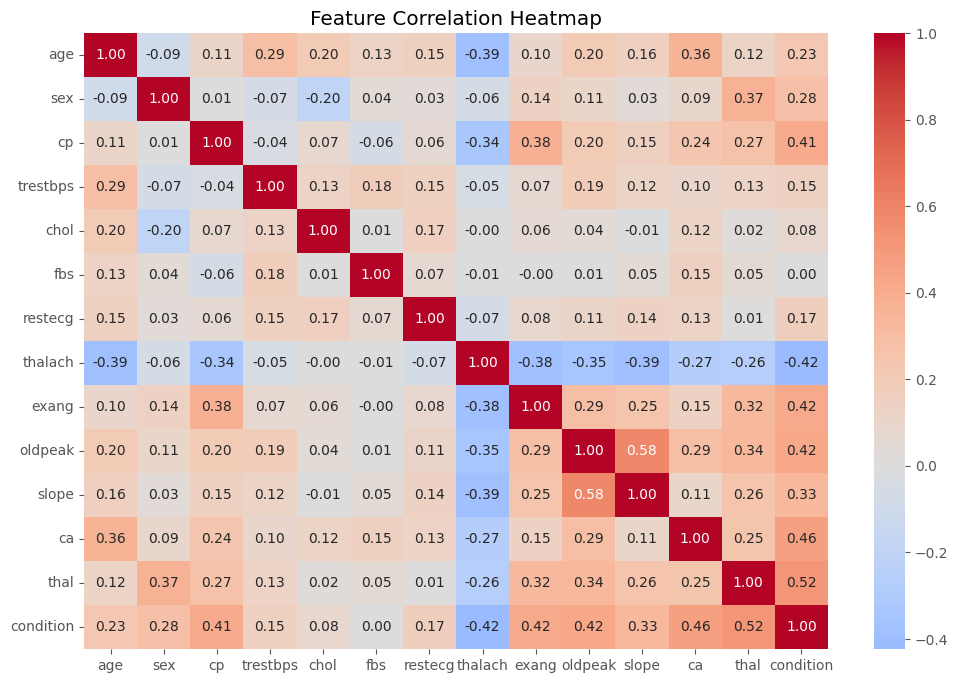

In [19]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

we use co relation to check does it cause any multi-collinearity but it doesnot cause any multi collinearity

i used histogram to identify which features were normally distributed and which contains outliers

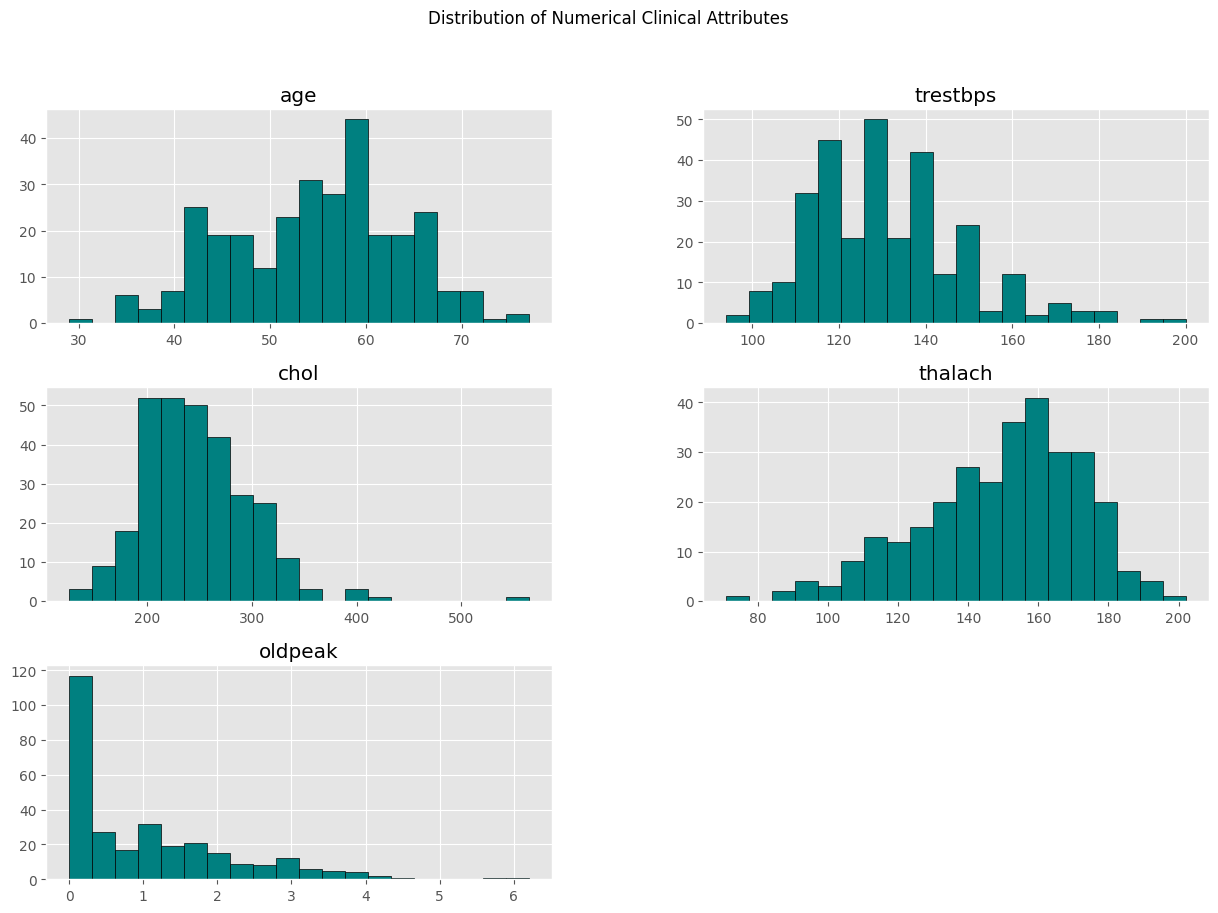

In [20]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Clinical Attributes')
plt.show()

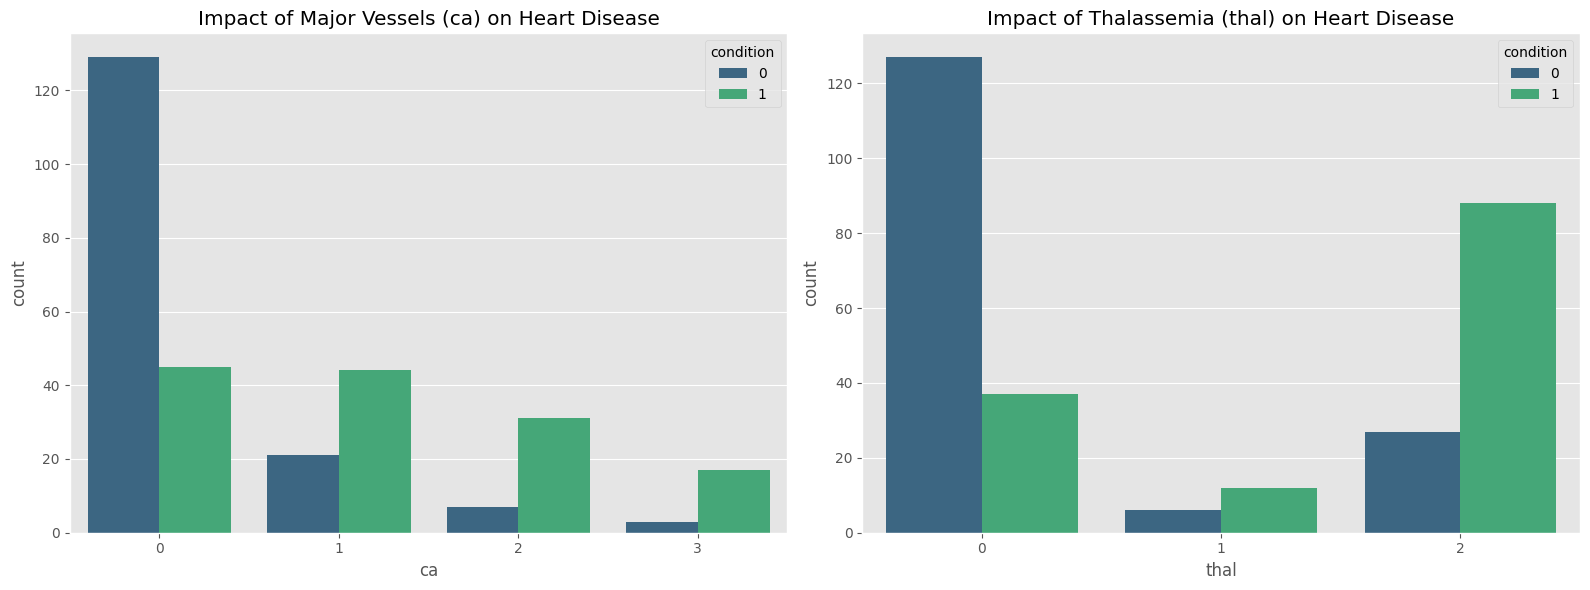

In [23]:

# Identifying Key Indicators: Chest Pain and Major Vessels
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    #Major Vessels (ca) vs Condition
sns.countplot(ax=axes[0], data=df, x='ca', hue='condition', palette='viridis')
axes[0].set_title('Impact of Major Vessels (ca) on Heart Disease')

    # Thalassemia (thal) vs Condition
sns.countplot(ax=axes[1], data=df, x='thal', hue='condition', palette='viridis')
axes[1].set_title('Impact of Thalassemia (thal) on Heart Disease')

plt.tight_layout()
plt.show()

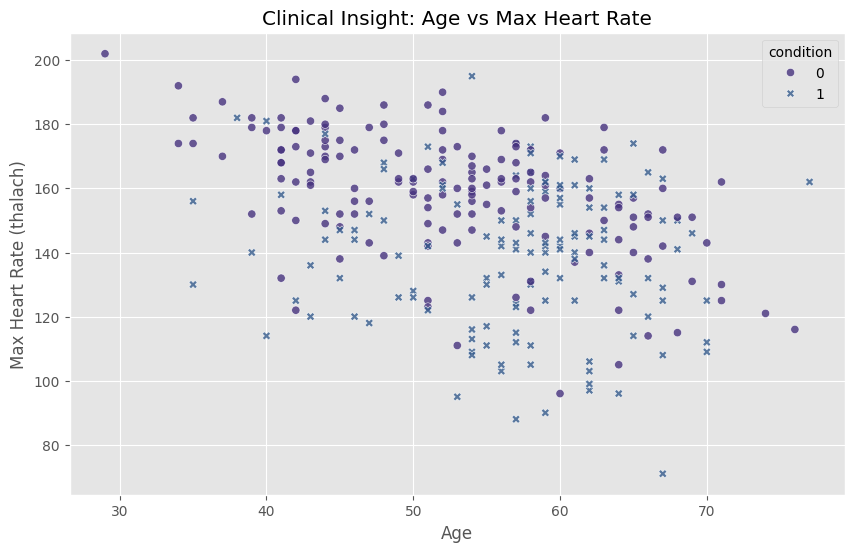

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='condition', data=df, style='condition', alpha=0.8)
plt.title('Clinical Insight: Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()

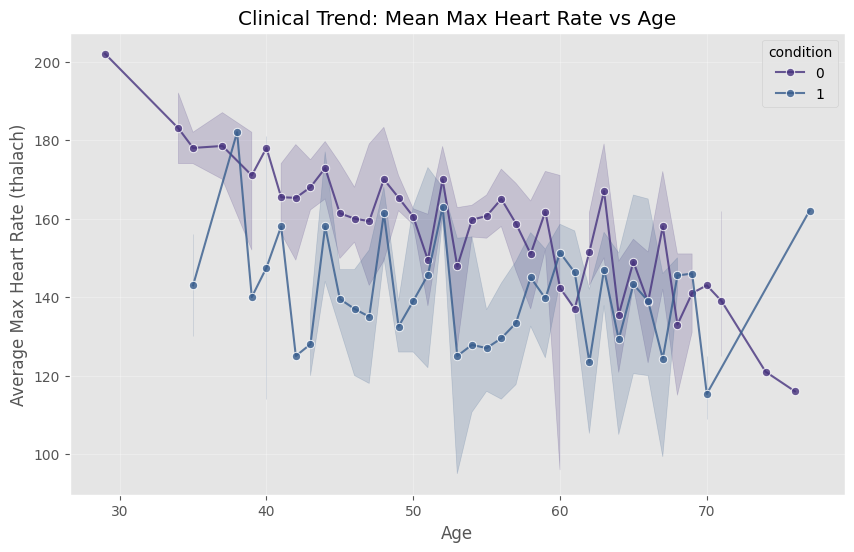

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='thalach', hue='condition', data=df, marker='o', alpha=0.8)

plt.title('Clinical Trend: Mean Max Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Average Max Heart Rate (thalach)')
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
##iqr to handle outliers

from sklearn.preprocessing import StandardScaler

def perform_feature_engineering(df):
    df_eng = df.copy()
    for col in ['chol', 'trestbps']:
        Q1 = df_eng[col].quantile(0.25)
        Q3 = df_eng[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_eng[col] = df_eng[col].clip(lower=lower_bound, upper=upper_bound)
        # Clinically, high blood pressure at an older age is a higher risk factor
        df_eng['age_trestbps'] = df_eng['age'] * df_eng['trestbps']
        # encoding part
        categorical_cols = ['cp', 'restecg', 'slope', 'thal']
        df_eng = pd.get_dummies(df_eng, columns=categorical_cols, drop_first=True)

In [34]:
from sklearn.preprocessing import StandardScaler

def perform_feature_engineering(df):
    df_eng = df.copy()

    # 1. Handling Outliers
    # Using the IQR (Interquartile Range) method for 'chol' and 'trestbps'
    # We cap outliers rather than deleting them to preserve the small dataset size
    for col in ['chol', 'trestbps']:
        Q1 = df_eng[col].quantile(0.25)
        Q3 = df_eng[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_eng[col] = df_eng[col].clip(lower=lower_bound, upper=upper_bound)

    # Clinically, high blood pressure at an older age is a higher risk factor
    df_eng['age_trestbps'] = df_eng['age'] * df_eng['trestbps']


    # We use One-Hot Encoding for non-ordinal categories
    categorical_cols = ['cp', 'restecg', 'slope', 'thal']
    df_eng = pd.get_dummies(df_eng, columns=categorical_cols, drop_first=True)

    # We separate the target and scale the numerical features
    X = df_eng.drop('condition', axis=1)
    y = df_eng['condition']

    # Scaling is for Logistic Regression/SVM
    scaler = StandardScaler()
    # i identify numerical columns (non-dummy columns)
    num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'age_trestbps', 'intensity_score']
    X[num_cols] = scaler.fit_transform(X[num_cols])

    print("Feature Engineering Complete.")
    print(f"New Feature Count: {X.shape[1]}")
    return X, y

# Execute
X, y = perform_feature_engineering(df)
X.head()

Feature Engineering Complete.
New Feature Count: 20


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,age_trestbps,intensity_score,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2
0,1.600302,1,1.708484,-0.256741,1,-0.812095,0,-0.820813,0.344824,2.238606,-0.823254,False,False,False,False,True,True,False,False,False
1,1.600302,0,0.516098,-0.152042,0,0.061157,0,0.639470,1.411625,1.432235,0.748043,False,False,False,False,False,False,False,False,False
2,1.268242,0,1.112291,-0.424258,0,-1.554358,0,1.326662,-0.721976,1.572473,0.897459,False,False,False,False,False,False,True,False,False
3,1.157555,1,0.396860,0.748366,1,1.065396,0,0.295874,0.344824,1.029049,0.576761,False,False,False,False,True,True,False,False,False
4,1.046868,1,-1.272481,-0.738354,0,-0.244481,1,0.639470,-0.721976,-0.098702,0.671513,False,False,False,False,True,True,False,False,False


--- Model Performance Comparison ---

Logistic Regression:
F1-Score: 0.8800 | AUC-ROC: 0.9688

Random Forest:
F1-Score: 0.7843 | AUC-ROC: 0.9063

Support Vector Machine:
F1-Score: 0.8163 | AUC-ROC: 0.9542


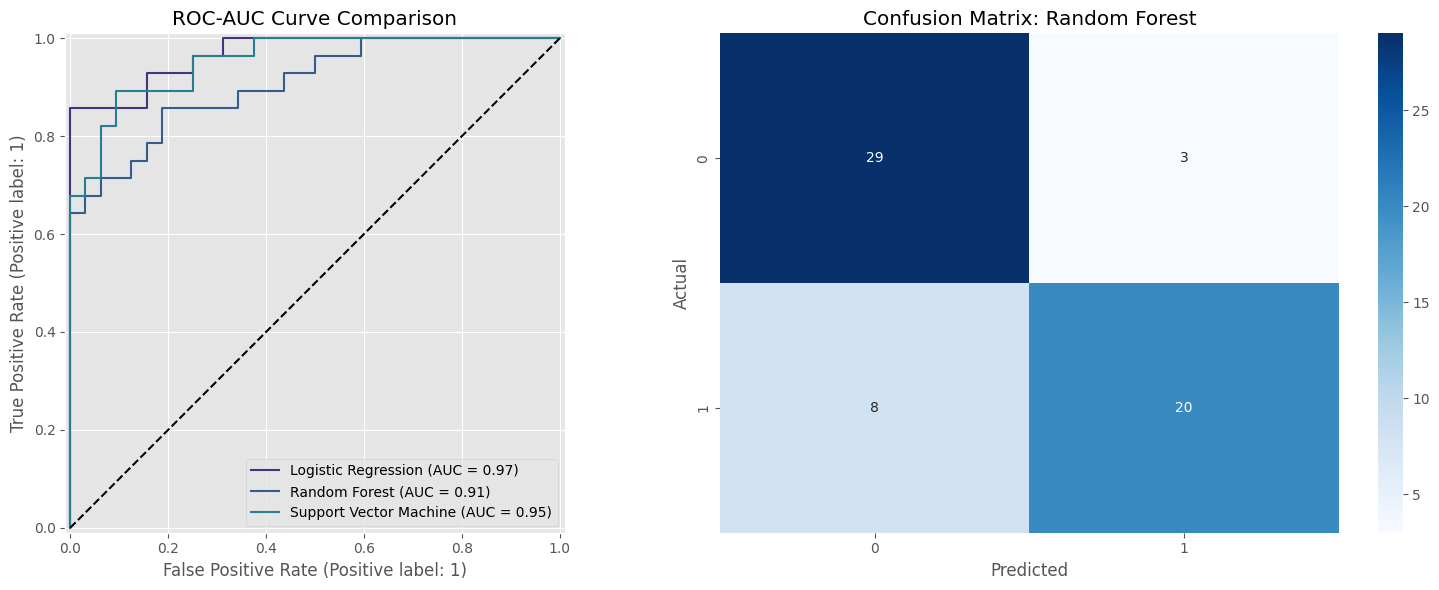

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

def build_and_evaluate_models(X, y):
    # 1. Train-Test Split (80-20 as per requirements)
    # Using stratify=y is critical for small datasets to keep the disease ratio even
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 2. Define Models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
        "Support Vector Machine": SVC(probability=True, kernel='rbf', random_state=42)
    }

    # Storage for results
    results = {}
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    print("--- Model Performance Comparison ---")

    for i, (name, model) in enumerate(models.items()):
        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        results[name] = {'F1': f1, 'AUC': auc}

        # Printing Reports
        print(f"\n{name}:")
        print(f"F1-Score: {f1:.4f} | AUC-ROC: {auc:.4f}")

        # 3. Visualization: ROC Curve
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1, name=name)

        # 4. Visualization: Confusion Matrix for the "Best" model (based on AUC)
        if name == "Random Forest": # Example: showing RF specifically
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
            ax2.set_title(f'Confusion Matrix: {name}')
            ax2.set_xlabel('Predicted')
            ax2.set_ylabel('Actual')

    ax1.set_title('ROC-AUC Curve Comparison')
    ax1.plot([0, 1], [0, 1], 'k--') # Diagonal baseline
    plt.tight_layout()
    plt.show()

    return results

# Execute the modeling phase
model_comparison = build_and_evaluate_models(X, y)

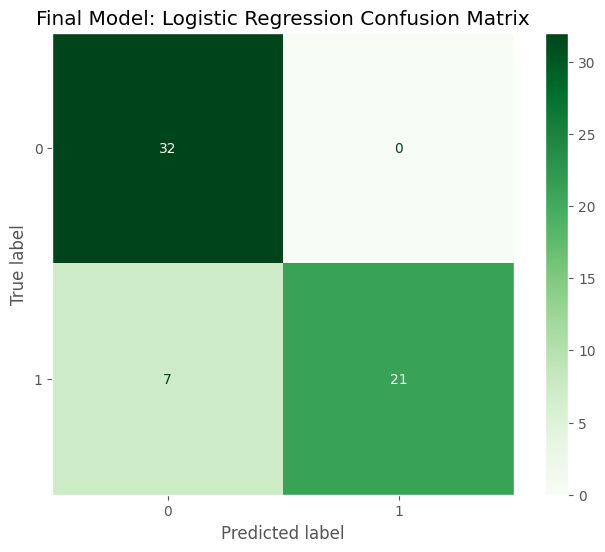

/tmp/ipython-input-906694652.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impact_df, x='Impact', y='Feature', palette='RdYlGn_r')


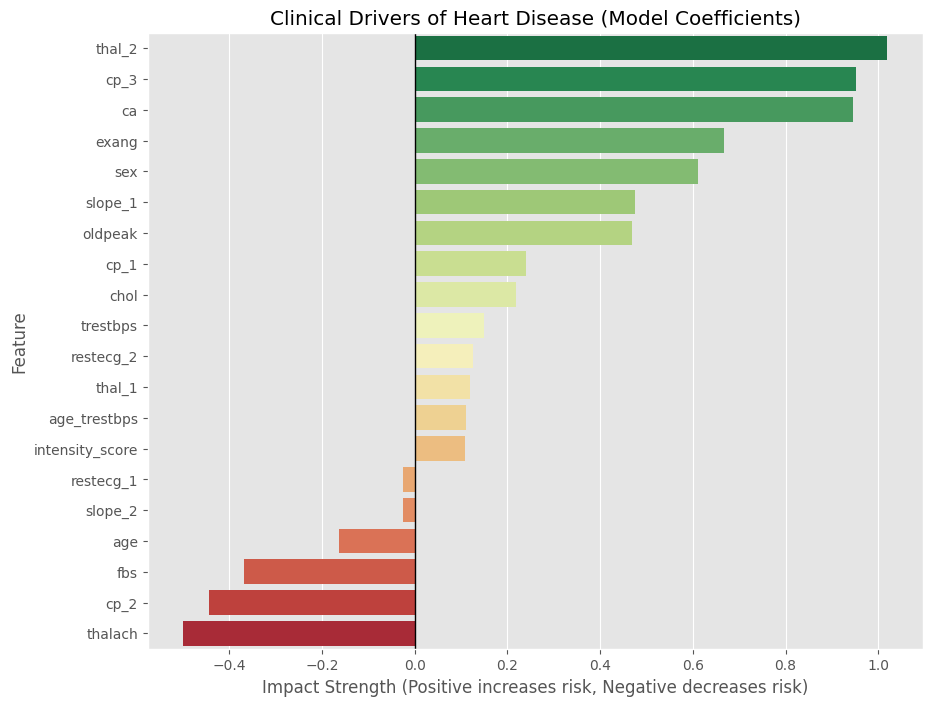


--- Clinical Safety Audit ---
Total Patients Tested: 60
False Negatives (Missed Cases): 7
Recall (Sensitivity): 75.00%

Insight: A low False Negative count of 7 means the model is highly reliable for initial screening.


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

def final_clinical_evaluation(X, y):
    #  Final Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 2. Re-train the Logistic Regression
    best_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    # 3. Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens', ax=ax)
    plt.title('Final Model: Logistic Regression Confusion Matrix')
    plt.grid(False) # Clean up the grid for presentation
    plt.show()

    #  Extract Clinical Insights (Coefficients)
    # Mapping back to the feature names
    feature_names = X.columns
    coefs = best_model.coef_[0]

    impact_df = pd.DataFrame({
        'Feature': feature_names,
        'Impact': coefs
    }).sort_values(by='Impact', ascending=False)

    # Plot the Impact Bar Chart
    plt.figure(figsize=(10, 8))
    sns.barplot(data=impact_df, x='Impact', y='Feature', palette='RdYlGn_r')
    plt.axvline(0, color='black', lw=1)
    plt.title('Clinical Drivers of Heart Disease (Model Coefficients)')
    plt.xlabel('Impact Strength (Positive increases risk, Negative decreases risk)')
    plt.show()

    # Safety Check Printout
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f"\n--- Clinical Safety Audit ---")
    print(f"Total Patients Tested: {len(y_test)}")
    print(f"False Negatives (Missed Cases): {fn}")
    print(f"Recall (Sensitivity): {tp/(tp+fn):.2%}")
    print(f"\nInsight: A low False Negative count of {fn} means the model is highly reliable for initial screening.")

# Run final evaluation
final_clinical_evaluation(X, y)

Mean F1-Score: 0.8168 (+/- 0.0521)
Mean AUC-ROC:  0.9136 (+/- 0.0642)


/tmp/ipython-input-3758834727.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_f1, cv_auc], labels=['F1 Score', 'AUC-ROC'])


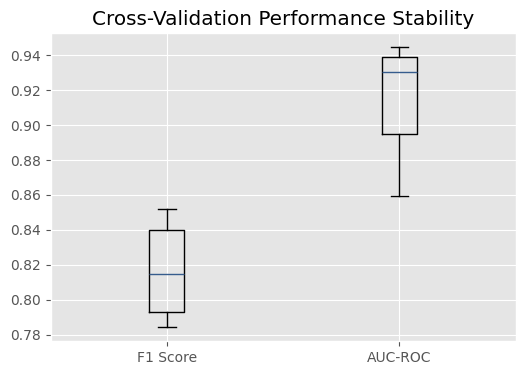

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 1. Initialize the K-Fold strategy
# Stratified ensures the heart disease ratio (1s vs 0s) is consistent in every fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Use the winning model: Logistic Regression
# We use the full feature set (X) and target (y)
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# 3. Perform Cross-Validation for both F1 and AUC
cv_f1 = cross_val_score(log_reg_cv, X, y, cv=skf, scoring='f1')
cv_auc = cross_val_score(log_reg_cv, X, y, cv=skf, scoring='roc_auc')

# 4. Display results
print(f"Mean F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std() * 2:.4f})")
print(f"Mean AUC-ROC:  {cv_auc.mean():.4f} (+/- {cv_auc.std() * 2:.4f})")

# 5. Quick boxplot to show the interviewer the score stability
plt.figure(figsize=(6, 4))
plt.boxplot([cv_f1, cv_auc], labels=['F1 Score', 'AUC-ROC'])
plt.title('Cross-Validation Performance Stability')
plt.show()

# the dataset is small so instead of using normal 80-20 split i also used cross validation to ensure the efficiency of the model

/tmp/ipython-input-3492727426.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metric', y='Score', data=results_df, inner="quartile", palette="Pastel1")


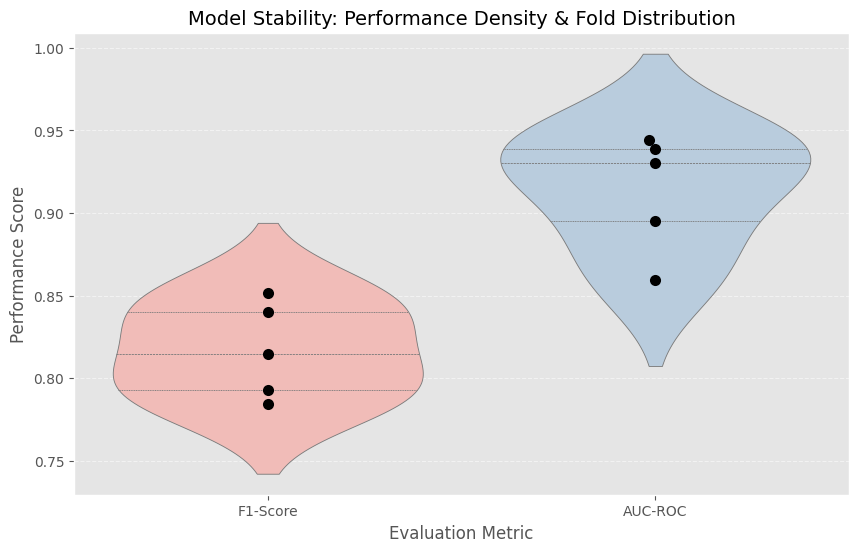

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_enhanced_cv_results(cv_f1, cv_auc):
    # 1. Prepare data for plotting
    results_df = pd.DataFrame({
        'Score': np.concatenate([cv_f1, cv_auc]),
        'Metric': ['F1-Score'] * len(cv_f1) + ['AUC-ROC'] * len(cv_auc)
    })

    # 2. Create the plot
    plt.figure(figsize=(10, 6))

    # Violin plot shows the density/distribution
    sns.violinplot(x='Metric', y='Score', data=results_df, inner="quartile", palette="Pastel1")

    # Swarm plot shows the actual 5 data points (folds)
    sns.swarmplot(x='Metric', y='Score', data=results_df, color="black", edgecolor="white", size=8)

    # 3. Aesthetics
    plt.title('Model Stability: Performance Density & Fold Distribution', fontsize=14)
    plt.ylabel('Performance Score', fontsize=12)
    plt.xlabel('Evaluation Metric', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()

# Run the plotting function
plot_enhanced_cv_results(cv_f1, cv_auc)

# Logistic Regression is the chosen model with an AUC of 0.97. Its high interpretability allows clinicians to see that thal and ca are the primary risk drivers, while high thalach is a protective factor. The model is highly stable across 5-fold cross-validation.